# Single cell analysis of P2 mouse retinal  cells using Seurat   
Here, I show the basic pipleline to analyse single cell data.   

This analysis contains downsampling, standard preprocessing, dimensional reduction, clustering, and identification of cell types.   

To see more detail in data source, please refer to the reference below.   
Clark BS. Neuron. 2019 Jun 19;102(6):1111-1126.e5.

# Load raw data into R
To obtain data, refer to the folloing URL.   
https://github.com/gofflab/developing_mouse_retina_scRNASeq

In [2]:
#Load the library
library(Matrix)
library(dplyr)
library(Seurat)

In [54]:
#Load the expression matrix
dat_count <- readMM("10x_mouse_retina_development.mtx")
#Load the each coordinate of cells in three dimensional UMAP space
dat_phenotype <- read.csv("10x_mouse_retina_development_phenotype.csv", header=T, row.names=1, stringsAsFactors=F)
#Load the annotation file
dat_feature <- read.csv("10x_mouse_retina_development_feature.csv", header=T, stringsAsFactors=F, row.names=1)

In [55]:
#Check the data dimensions
dim(dat_count)
dim(dat_phenotype)
dim(dat_feature)

[1]  27998 107052

[1] 107052    100

[1] 27998     7

In [20]:
#Show the subset of the data
head(dat_count)

6 x 107052 sparse Matrix of class "dgTMatrix"
                                                                               
[1,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[2,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[3,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[4,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[5,] . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ......
[6,] . . . . . . . . . . . . . . . . . . . . . . 1 . . . . . . . . . . . ......

 .....suppressing columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [21]:
#Show the subset of the data
head(dat_phenotype)

,barcode,sample,age,Size_Factor,num_genes_expressed,Total_mRNAs,CellType,raw_cluster,new_CellType,largeVis1,⋯,Patt.71,Patt.72,Patt.73,Patt.74,Patt.75,Patt.76,Patt.77,Patt.78,Patt.79,Patt.80
,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
E11.AAACCTGAGATGTAAC.1,E11.AAACCTGAGATGTAAC-1,E11,E11,1.733369,1549,2794,RPCs,32,Early RPCs,2.2338175,⋯,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
E11.AAACCTGAGGCAATTA.1,E11.AAACCTGAGGCAATTA-1,E11,E11,2.201143,1848,3548,RPCs,9,Early RPCs,-0.6808101,⋯,1.008011,21.921519,16.938427,1.000011,1.000180,60.656578,1.002151,37.660817,1.000047,1.000198
E11.AAACCTGAGTAGCGGT.1,E11.AAACCTGAGTAGCGGT-1,E11,E11,2.381057,1935,3838,RPCs,24,RPE/Margin/Periocular Mesenchyme/Lens Epithelial Cells,1.6031758,⋯,250.307592,1.004293,1.000764,1.002577,1.000022,1.000262,1.000022,1.170338,1.001827,1.000559
E11.AAACCTGAGTGGAGTC.1,E11.AAACCTGAGTGGAGTC-1,E11,E11,2.861238,2139,4612,RPCs,9,Early RPCs,-0.7359965,⋯,1.016430,50.007646,1.011516,1.002841,1.000161,41.925894,1.001989,8.626739,1.021516,1.001392
E11.AAACCTGCAAGTTGTC.1,E11.AAACCTGCAAGTTGTC-1,E11,E11,2.044805,1723,3296,Lens Epithelia,74,RPE/Margin/Periocular Mesenchyme/Lens Epithelial Cells,2.7458238,⋯,1.000668,19.482778,1.000139,1.018392,1.000059,1.000044,1.010160,1.000184,1.000493,3.845403
E11.AAACCTGCACCCATTC.1,E11.AAACCTGCACCCATTC-1,E11,E11,2.280553,1806,3676,RPCs,32,Early RPCs,1.9579134,⋯,1.000071,1.211624,1.006995,1.000126,1.000037,1.001017,1.003272,248.890062,1.000286,1.000414


In [56]:
#Show the subset of the data
head(dat_feature)

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000051951,ENSMUSG00000051951,Xkr4,253,2.119135e-03,0.046522355,481.95455,0.209430151
ENSMUSG00000089699,ENSMUSG00000089699,Gm1992,4,3.311149e-05,0.005754187,30200.24999,0.003311149
ENSMUSG00000102343,ENSMUSG00000102343,Gm37381,58,4.801166e-04,0.021906392,2081.84482,0.048011655
ENSMUSG00000025900,ENSMUSG00000025900,Rp1,11816,1.694811e-01,0.635347014,14.05333,9.781133075
ENSMUSG00000109048,ENSMUSG00000109048,Rp1,0,0.000000e+00,0.000000000,NA,0.000000000
ENSMUSG00000025902,ENSMUSG00000025902,Sox17,108,1.622463e-03,0.077612551,2288.30757,0.089401013


# Create Seurat class object and subsampling
Below procedure requires a lots of memory, so I partially performed analysis in a HPC cluster

In [ ]:
#Creat Seurat class object
colnames(dat_count) <- rownames(dat_phenotype)
rownames(dat_count) <- rownames(dat_feature)
dat <- CreateSeuratObject(counts = dat_count, project = "Clark_P2_Retina", meta.data = dat_phenotype)

In [30]:
#Select only cells from P2 retina
dat <- subset(dat, subset = (age=="P2"))

[1] "dat_count"     "dat_feature"   "dat_phenotype" "data_feature"

In [ ]:
#Save dat object in RDS format
 saveRDS(dat, file="Clark_P2_Retina.rds")

From here, we go back to local laptop environment   
In order to perform this tutorial, you can start from here because you can handle the down sized sample

In [2]:
#Load the library
library(Matrix)
library(Seurat)

#Load dat object
dat <- readRDS(file = "Clark_P2_Retina.rds")

In [3]:
#Dimension of the down-sampled data
dim(dat)

[1] 27998 15582

In [4]:
#Structure of dat object
str(dat)

Formal class 'Seurat' [package "Seurat"] with 12 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "Seurat"] with 7 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:18425089] 16 26 62 63 70 150 152 179 181 212 ...
  .. .. .. .. .. ..@ p       : int [1:15583] 0 1144 2376 3256 4695 6018 7240 8903 10089 11395 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 27998 15582
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:27998] "ENSMUSG00000051951" "ENSMUSG00000089699" "ENSMUSG00000102343" "ENSMUSG00000025900" ...
  .. .. .. .. .. .. ..$ : chr [1:15582] "P2_rep2.AAACCTGAGATAGGAG.1" "P2_rep2.AAACCTGAGCATCATC.1" "P2_rep2.AAACCTGAGCCTATGT.1" "P2_rep2.AAACCTGAGCTAGCCC.1" ...
  .. .. .. .. .. ..@ x       : num [1:18425089] 1 3 5 1 1 1 1 1 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  

# QC and selecting cells for further analysis

### Caliculate the percentage of reads that map to the mitochondrial genome

I am using gene IDs as row names of expression dataset.   
Here, I extract gene IDs of mitochondrial genes.

In [5]:
#Load the annotation file
dat_feature <- read.csv("10x_mouse_retina_development_feature.csv", header=T, stringsAsFactors=F, row.names=1)

In [6]:
head(dat_feature)

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000051951,ENSMUSG00000051951,Xkr4,253,2.119135e-03,0.046522355,481.95455,0.209430151
ENSMUSG00000089699,ENSMUSG00000089699,Gm1992,4,3.311149e-05,0.005754187,30200.24999,0.003311149
ENSMUSG00000102343,ENSMUSG00000102343,Gm37381,58,4.801166e-04,0.021906392,2081.84482,0.048011655
ENSMUSG00000025900,ENSMUSG00000025900,Rp1,11816,1.694811e-01,0.635347014,14.05333,9.781133075
ENSMUSG00000109048,ENSMUSG00000109048,Rp1,0,0.000000e+00,0.000000000,NA,0.000000000
ENSMUSG00000025902,ENSMUSG00000025902,Sox17,108,1.622463e-03,0.077612551,2288.30757,0.089401013


In [7]:
attach(dat_feature)

In [8]:
grep("^mt-", gene_short_name)

[1] 27909 27910 27911 27912 27913 27914 27915 27916 27917 27918 27919 27920
[13] 27921

In [9]:
mt_genes_id <- id[grep("^mt-", gene_short_name)]
mt_genes_id

[1] "ENSMUSG00000064341" "ENSMUSG00000064345" "ENSMUSG00000064351"
 [4] "ENSMUSG00000064354" "ENSMUSG00000064356" "ENSMUSG00000064357"
 [7] "ENSMUSG00000064358" "ENSMUSG00000064360" "ENSMUSG00000065947"
[10] "ENSMUSG00000064363" "ENSMUSG00000064367" "ENSMUSG00000064368"
[13] "ENSMUSG00000064370"

In [10]:
dat_feature[mt_genes_id,]

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000064341,ENSMUSG00000064341,mt-Nd1,116133,1.115882e+01,10.20376284,8.361501e-01,96.133406179
ENSMUSG00000064345,ENSMUSG00000064345,mt-Nd2,87817,2.112289e+00,2.54173510,1.447951e+00,72.693784974
ENSMUSG00000064351,ENSMUSG00000064351,mt-Co1,57339,8.231433e-01,1.23076563,2.235630e+00,47.464487931
ENSMUSG00000064354,ENSMUSG00000064354,mt-Co2,2441,2.066157e-02,0.14688724,5.054074e+01,2.020628456
ENSMUSG00000064356,ENSMUSG00000064356,mt-Atp8,5,4.138936e-05,0.00643335,2.416000e+04,0.004138936
ENSMUSG00000064357,ENSMUSG00000064357,mt-Atp6,4438,3.913778e-02,0.20916155,2.856087e+01,3.673719413
ENSMUSG00000064358,ENSMUSG00000064358,mt-Co3,4504,3.957650e-02,0.20862317,2.778755e+01,3.728353366
ENSMUSG00000064360,ENSMUSG00000064360,mt-Nd3,74,6.208404e-04,0.02523917,1.652686e+03,0.061256250
ENSMUSG00000065947,ENSMUSG00000065947,mt-Nd4l,0,0.000000e+00,0.00000000,NA,0.000000000


In [11]:
# Caliculate the percentage of reads that map to the mitochondrial genome
# The [[ operator can add columns to object metadata. This is a great place to stash QC stats
dat[["percent.mt"]] <- PercentageFeatureSet(dat, features = mt_genes_id)

In [12]:
# Show QC metrics for the first 5 cells
dat@meta.data[1:5, c("nFeature_RNA", "nCount_RNA", "percent.mt")]

,nFeature_RNA,nCount_RNA,percent.mt
,<int>,<dbl>,<dbl>
P2_rep2.AAACCTGAGATAGGAG.1,1144,1771,2.258611
P2_rep2.AAACCTGAGCATCATC.1,1232,2061,1.552644
P2_rep2.AAACCTGAGCCTATGT.1,880,1563,1.279591
P2_rep2.AAACCTGAGCTAGCCC.1,1439,2424,1.856436
P2_rep2.AAACCTGAGGTACTCT.1,1323,2204,1.860254


### Filtering cells based on QC metrics

In [13]:
# Summarize the QC metrics
summary(dat@meta.data[1:5, c("nFeature_RNA", "nCount_RNA", "percent.mt")])

  nFeature_RNA    nCount_RNA     percent.mt   
 Min.   : 880   Min.   :1563   Min.   :1.280  
 1st Qu.:1144   1st Qu.:1771   1st Qu.:1.553  
 Median :1232   Median :2061   Median :1.856  
 Mean   :1204   Mean   :2005   Mean   :1.762  
 3rd Qu.:1323   3rd Qu.:2204   3rd Qu.:1.860  
 Max.   :1439   Max.   :2424   Max.   :2.259  

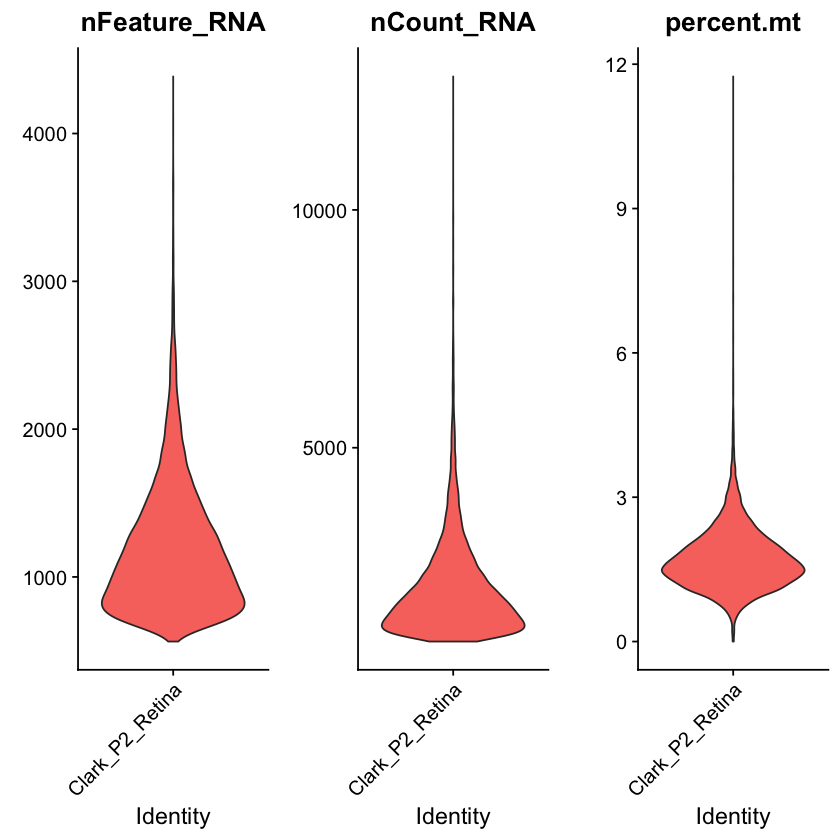

In [14]:
# Visualize QC metrics as a violin plot
VlnPlot(dat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size=FALSE)

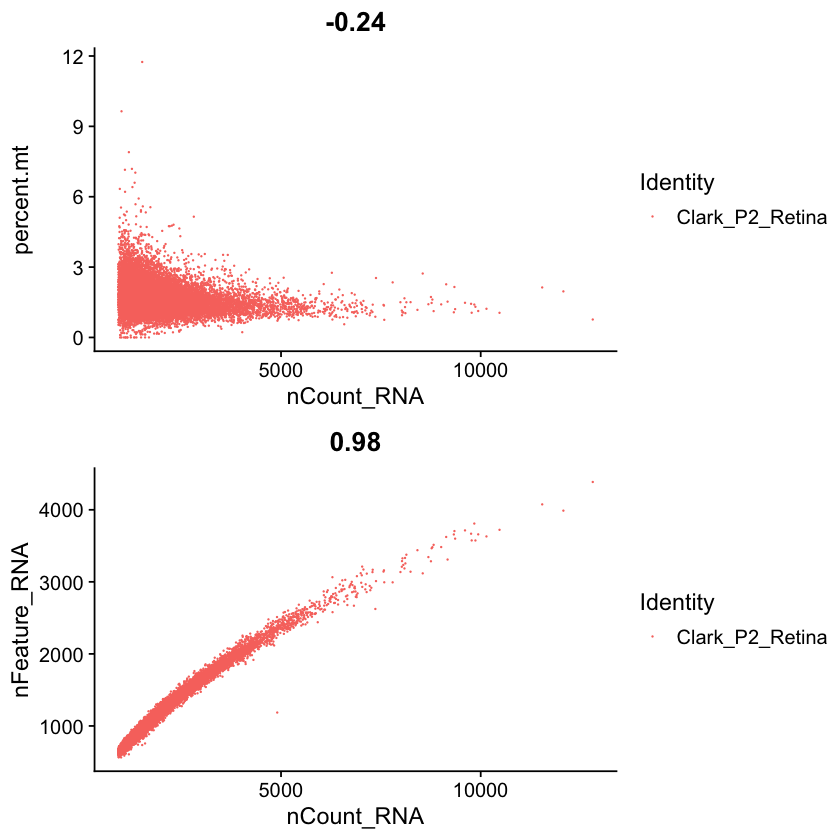

In [15]:
#Scatterplot for QC metrics
plot1 <- FeatureScatter(dat, feature1 = "nCount_RNA", feature2 = "percent.mt", pt.size = 0.001)
plot2 <- FeatureScatter(dat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA", pt.size = 0.001)
CombinePlots(plots = list(plot1, plot2), ncol=1)

In the example below, we visualize QC metrics, and use these to filter cells.

We filter cells that have number of counts over 90% Qu or less than 1,771 10% Qu.
We filter cells that have >5% mitochondrial counts, hence no cells will be filtered out in this criteria.

In [16]:
quantile(dat@meta.data[, "nCount_RNA"], c(0.1, 0.9))

10%    90% 
1122.0 3265.8

In [17]:
dat

An object of class Seurat 
27998 features across 15582 samples within 1 assay 
Active assay: RNA (27998 features)

In [18]:
#Filtering cells based on nCount_RNA and percent.mt
dat <- subset(dat, subset = nCount_RNA > 1122 & nCount_RNA < 3265.8 & percent.mt < 5)

In [19]:
#The number of samples were reduced from 15,582 to 7,153 cells
dat

An object of class Seurat 
27998 features across 12439 samples within 1 assay 
Active assay: RNA (27998 features)

# Normalizing the data

After removing unwanted cells from the dataset, the next step is to normalize the data.   
I employ a global-scaling normalization method “LogNormalize” that normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result.   
Normalized values are stored in dat[["RNA"]]@data.   

In [24]:
dat <- NormalizeData(dat, normalization.method = "LogNormalize", scale.factor = 10000)

# Identification of highly variable features (feature selection)

I next calculate a subset of features that exhibit high cell-to-cell variation in the dataset (i.e, they are highly expressed in some cells, and lowly expressed in others).   
It has been reported that focusing on these genes in downstream analysis helps to highlight biological signal in single-cell datasets.

In [25]:
#Obtain top 2,000 features (genes) with highly variable expression accross cells
dat <- FindVariableFeatures(dat, selection.method = "vst", nfeatures = 2000)

In [26]:
# Identify the 10 most highly variable genes
top10 <- head(VariableFeatures(dat), 10)

In [27]:
#Load the annotation file
dat_feature <- read.csv("10x_mouse_retina_development_feature.csv", header=T, stringsAsFactors=F, row.names=1)

In [38]:
#Show the 10 most highly variable gnes
dat_feature[top10, ]

,id,gene_short_name,num_cells_expressed,mean_expr,sd_exprs,bcv,percent_detection
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ENSMUSG00000021647,ENSMUSG00000021647,Cartpt,478,0.04145558,1.8290797,1946.70109,0.3956823
ENSMUSG00000058831,ENSMUSG00000058831,Opn1sw,5483,0.33833317,3.0845952,83.12032,4.5387570
ENSMUSG00000019874,ENSMUSG00000019874,Fabp7,19687,1.03114135,4.6533936,20.36588,16.2966458
ENSMUSG00000032291,ENSMUSG00000032291,Crabp1,15203,0.41496970,2.5484544,37.71559,12.5848482
ENSMUSG00000025927,ENSMUSG00000025927,Tfap2b,11272,0.39176683,1.8218139,21.62483,9.3308169
ENSMUSG00000041670,ENSMUSG00000041670,Rims1,1237,0.02694447,0.4473681,275.67072,1.0239727
ENSMUSG00000064330,ENSMUSG00000064330,Pde6h,1345,0.03790437,0.5063885,178.47981,1.1133737
ENSMUSG00000056055,ENSMUSG00000056055,Sag,22703,1.72606867,5.8158507,11.35299,18.7932519
ENSMUSG00000032292,ENSMUSG00000032292,Nr2e3,18582,0.71669812,2.3558853,10.80527,15.3819410


When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


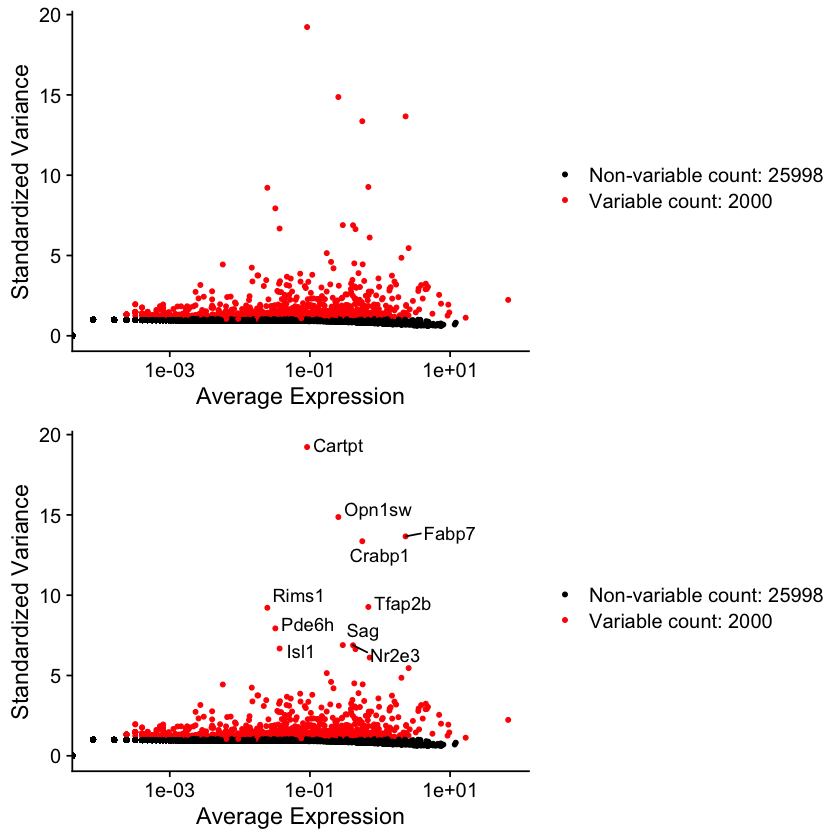

In [39]:
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(dat)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE, labels = dat_feature[top10, "gene_short_name"])
CombinePlots(plots = list(plot1, plot2), ncol = 1)

# Scaling the data

Next, I apply a linear transformation (‘scaling’) that is a standard pre-processing step prior to dimensional reduction techniques like PCA.    
The ScaleData function:   
    Shifts the expression of each gene, so that the mean expression across cells is 0   
    Scales the expression of each gene, so that the variance across cells is 1 (This step gives equal weight in downstream analyses, so that highly-expressed genes do not dominate)   
    The results of this are stored in dat[["RNA"]]@scale.data

In [40]:
all.genes <- rownames(dat)
dat <- ScaleData(dat, features = all.genes)

Centering and scaling data matrix



# Perform linear dimensional reduction

Next I perform PCA on the scaled data.   
By default, only the previously determined variable features are used as input, but can be defined using features argument if you choose a different subset.

In [41]:
dat <- RunPCA(dat, features = VariableFeatures(object = dat))

PC_ 1 
Positive:  ENSMUSG00000021268, ENSMUSG00000034701, ENSMUSG00000062380, ENSMUSG00000024501, ENSMUSG00000027350, ENSMUSG00000022658, ENSMUSG00000092341, ENSMUSG00000027210, ENSMUSG00000027273, ENSMUSG00000021848 
	   ENSMUSG00000006651, ENSMUSG00000063919, ENSMUSG00000048015, ENSMUSG00000100252, ENSMUSG00000002058, ENSMUSG00000019874, ENSMUSG00000031840, ENSMUSG00000023439, ENSMUSG00000038811, ENSMUSG00000021087 
	   ENSMUSG00000033379, ENSMUSG00000071648, ENSMUSG00000024268, ENSMUSG00000041417, ENSMUSG00000022237, ENSMUSG00000033152, ENSMUSG00000053192, ENSMUSG00000042675, ENSMUSG00000025927, ENSMUSG00000076431 
Negative:  ENSMUSG00000070348, ENSMUSG00000026385, ENSMUSG00000054717, ENSMUSG00000023004, ENSMUSG00000040204, ENSMUSG00000022528, ENSMUSG00000005233, ENSMUSG00000020914, ENSMUSG00000028943, ENSMUSG00000037894 
	   ENSMUSG00000022033, ENSMUSG00000026989, ENSMUSG00000026547, ENSMUSG00000017716, ENSMUSG00000048001, ENSMUSG00000019942, ENSMUSG00000028873, ENSMUSG00000021377,

In [43]:
# Examine and visualize PCA results a few different ways
print(dat[["pca"]], dims = 1:5, nfeatures = 5)

PC_ 1 
Positive:  ENSMUSG00000021268, ENSMUSG00000034701, ENSMUSG00000062380, ENSMUSG00000024501, ENSMUSG00000027350 
Negative:  ENSMUSG00000070348, ENSMUSG00000026385, ENSMUSG00000054717, ENSMUSG00000023004, ENSMUSG00000040204 
PC_ 2 
Positive:  ENSMUSG00000025927, ENSMUSG00000032291, ENSMUSG00000034336, ENSMUSG00000058672, ENSMUSG00000018411 
Negative:  ENSMUSG00000038811, ENSMUSG00000021848, ENSMUSG00000023439, ENSMUSG00000071648, ENSMUSG00000006007 
PC_ 3 
Positive:  ENSMUSG00000049932, ENSMUSG00000030654, ENSMUSG00000001403, ENSMUSG00000006007, ENSMUSG00000017716 
Negative:  ENSMUSG00000021453, ENSMUSG00000048001, ENSMUSG00000026475, ENSMUSG00000027239, ENSMUSG00000067071 
PC_ 4 
Positive:  ENSMUSG00000029177, ENSMUSG00000001403, ENSMUSG00000006398, ENSMUSG00000020415, ENSMUSG00000021453 
Negative:  ENSMUSG00000056394, ENSMUSG00000027342, ENSMUSG00000026355, ENSMUSG00000029591, ENSMUSG00000064326 
PC_ 5 
Positive:  ENSMUSG00000001525, ENSMUSG00000056394, ENSMUSG00000020649, ENSMUS

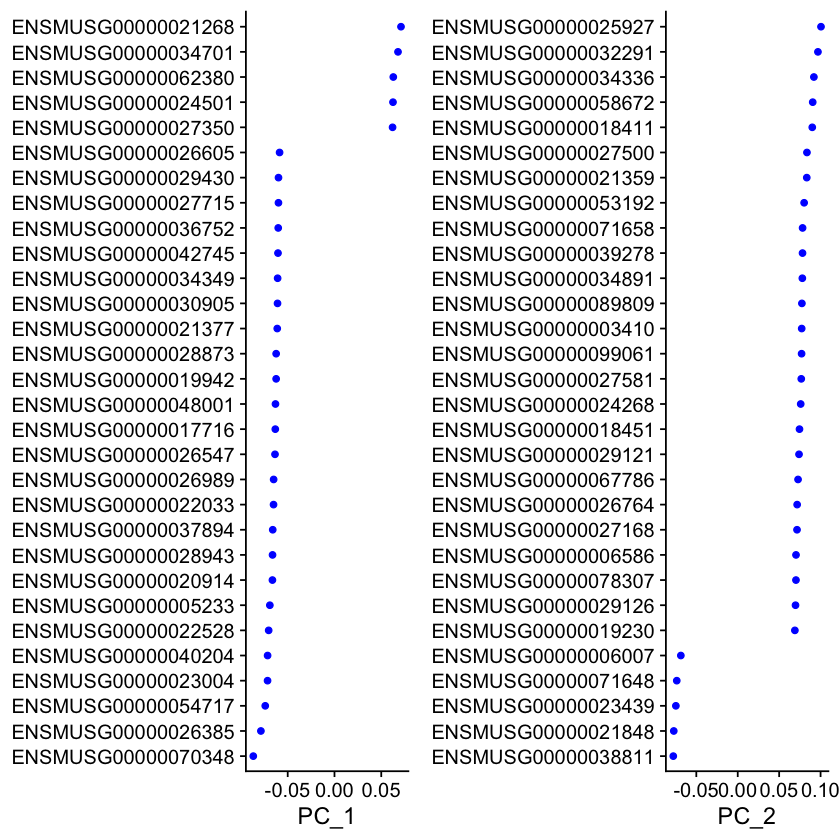

In [58]:
VizDimLoadings(dat, dims = 1:2, reduction = "pca")

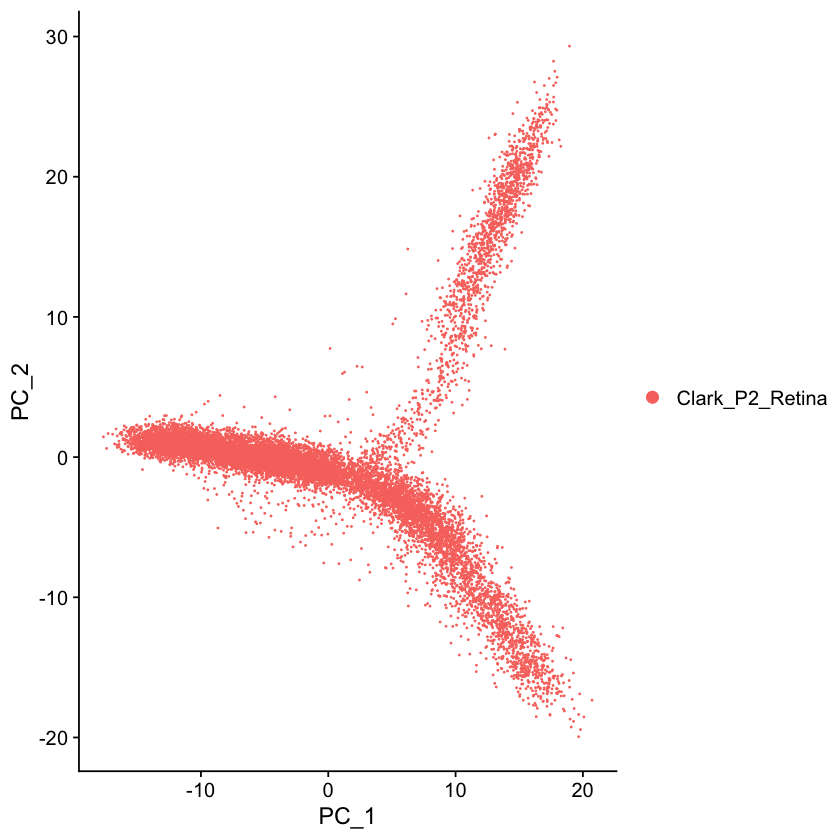

In [61]:
DimPlot(dat, reduction = "pca")

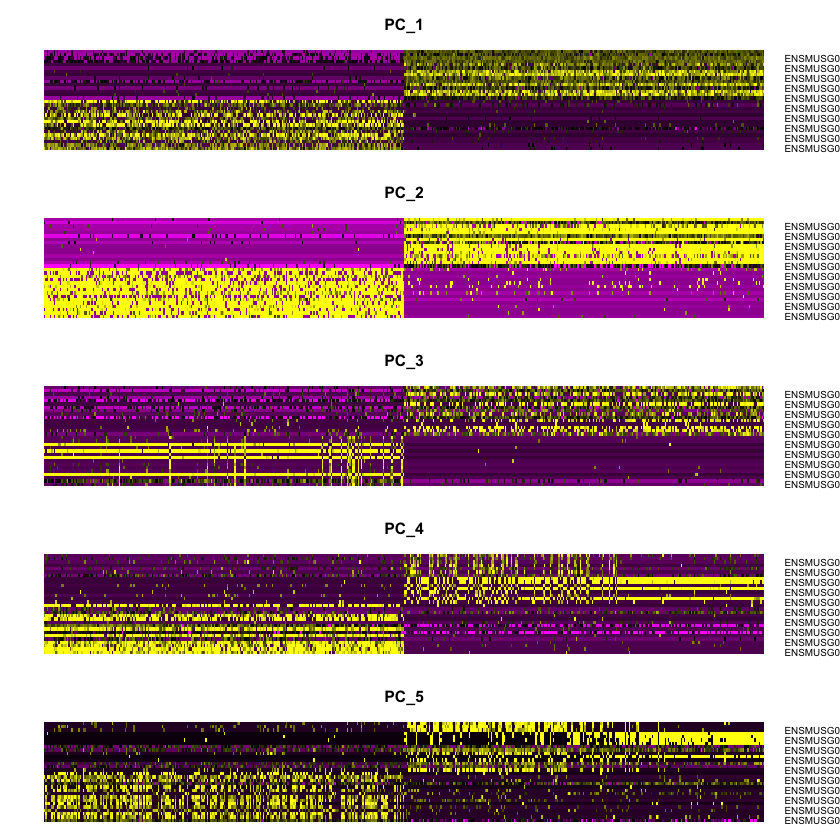

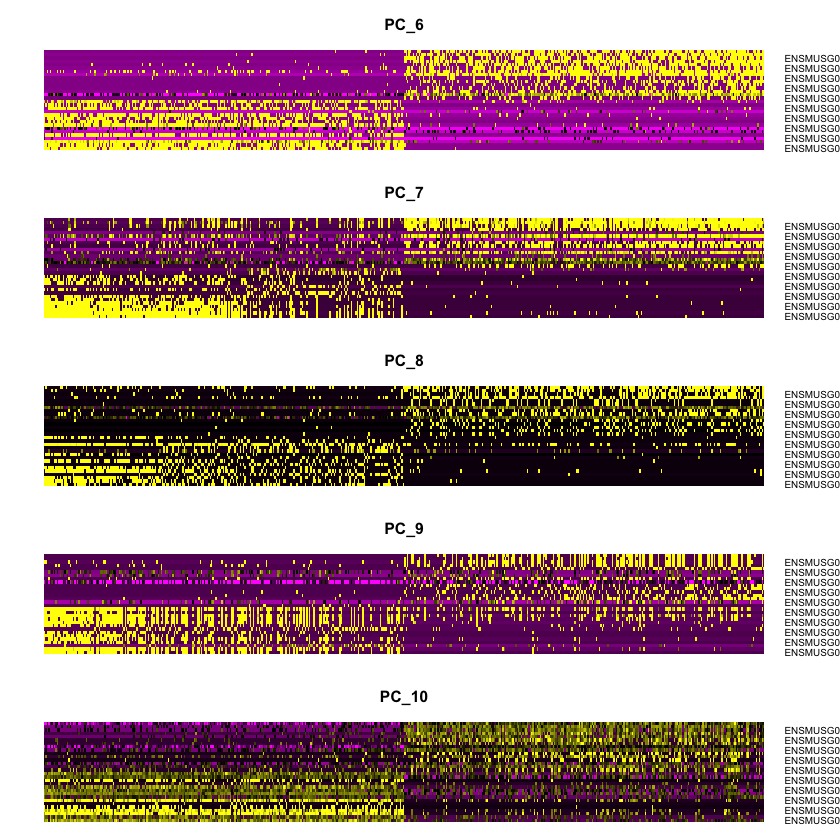

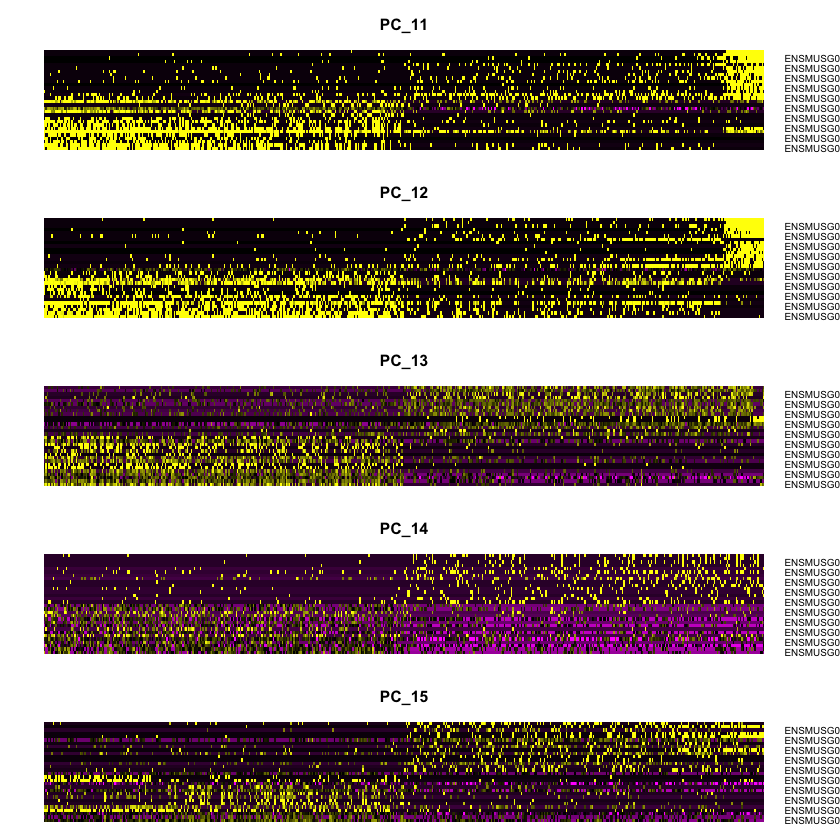

In [64]:
DimHeatmap(dat, dims = 1:15, cells = 500, balanced = TRUE, ncol = 1)

# Determine the ‘dimensionality’ of the dataset

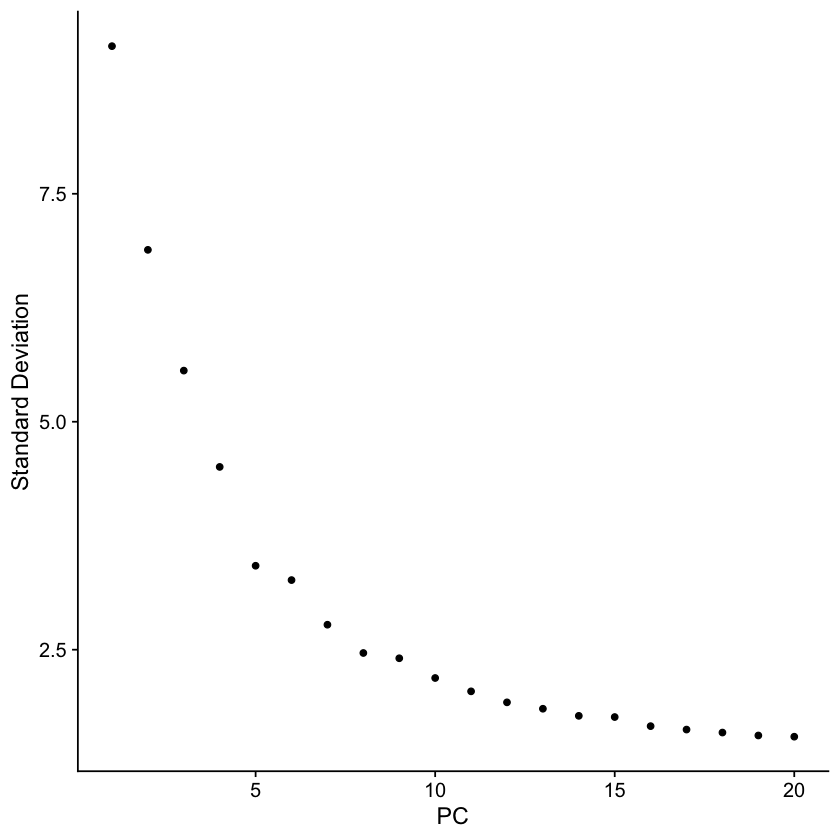

In [65]:
ElbowPlot(dat)

I chose 20 top PCs here.